<a href="https://colab.research.google.com/github/AbhishekRP2002/ML-AI-Notes-and-Self-Practice/blob/main/Improving_CV_Accuracy_using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Computer Vision Accuracy using Convolutions

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [3]:
#Loading the fashion mnist dataset from keras , Tensorflow
fmnist = tf.keras.datasets.fashion_mnist
(training_images , training_labels) , ( test_images , test_labels) =fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#Normalize the pixel values
training_images = training_images/255.0
test_images = test_images/255.0

In [5]:
#Define the model with tf.keras

model = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(128, activation = tf.nn.relu),
         tf.keras.layers.Dense(10, activation = tf.nn.softmax)

])

#Model compile stage : Setting up the parameters for the model 
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

#Model fitting stage or Train the model stage
print(f'\nMODEL TRAINING:')
model.fit(training_images , training_labels ,epochs =5)

#Evaluate on the test data
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images , test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4958 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3353 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.8924

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8761


# Convolutional Neural Network

The concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focused and possibly more accurate.

In [6]:
#Redefine the model but this time with MaxPool and Conv layer
model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(32, (3,3) , activation= 'relu' , input_shape =(28 ,28, 1)),
         tf.keras.layers.MaxPooling2D(2,2),
         tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
         tf.keras.layers.MaxPooling2D(2,2),

         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(128, activation = 'relu'),
         tf.keras.layers.Dense(10 , activation = 'softmax')

                         
])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4681 - accuracy: 0.8314
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3165 - accuracy: 0.8841
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2713 - accuracy: 0.9003
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2396 - accuracy: 0.9108
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2167 - accuracy: 0.9186

MODEL EVALUATION:
313/313 [==============================] - 2s 7ms/step - loss: 0.2579 - accuracy: 0.9076


For a convolutional layer , the parameters are:
- The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
- The size of the Convolution. In this case, a 3x3 grid.
- The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.
- In the first layer, the shape of the input data.

You'll follow the convolution with a MaxPool2D layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
Then you added another convolution and flattened the output.

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
After this, you'll just have the same DNN structure as the non convolutional version. The same 128 dense layers, and 10 output layers as in the pre-convolution example:

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Visualizing the Convolutions and Pooling

In [8]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


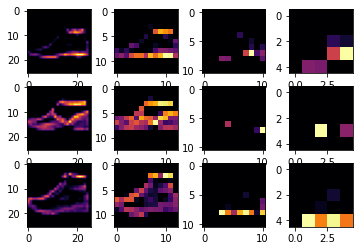

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Exploring Convolutions

https://lodev.org/cgtutor/filtering.html

https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb